# 在算过易为老师06年的文章之后，我准备用fsolve包来计算，全用无量纲化方法
## 0. 用$\delta$解析式重复一下无费米面分子态的结果，自变量分别是$\delta$、B
## 1. 用$\delta$数值积分重复一下有费米面分子态的结果，自变量是$\delta$
## 2. 用$\delta$数值积分重复一下我需要的（无费米面分子态）的结果，自变量是$\delta$
## 3. 把$\delta$换成B，重复出来我需要的结果

***
***

## 0. 用$\delta$解析式重复一下无费米面分子态的结果，自变量分别是$\delta$、B
### 0.1 定义自变量是$\delta$积分后的结果

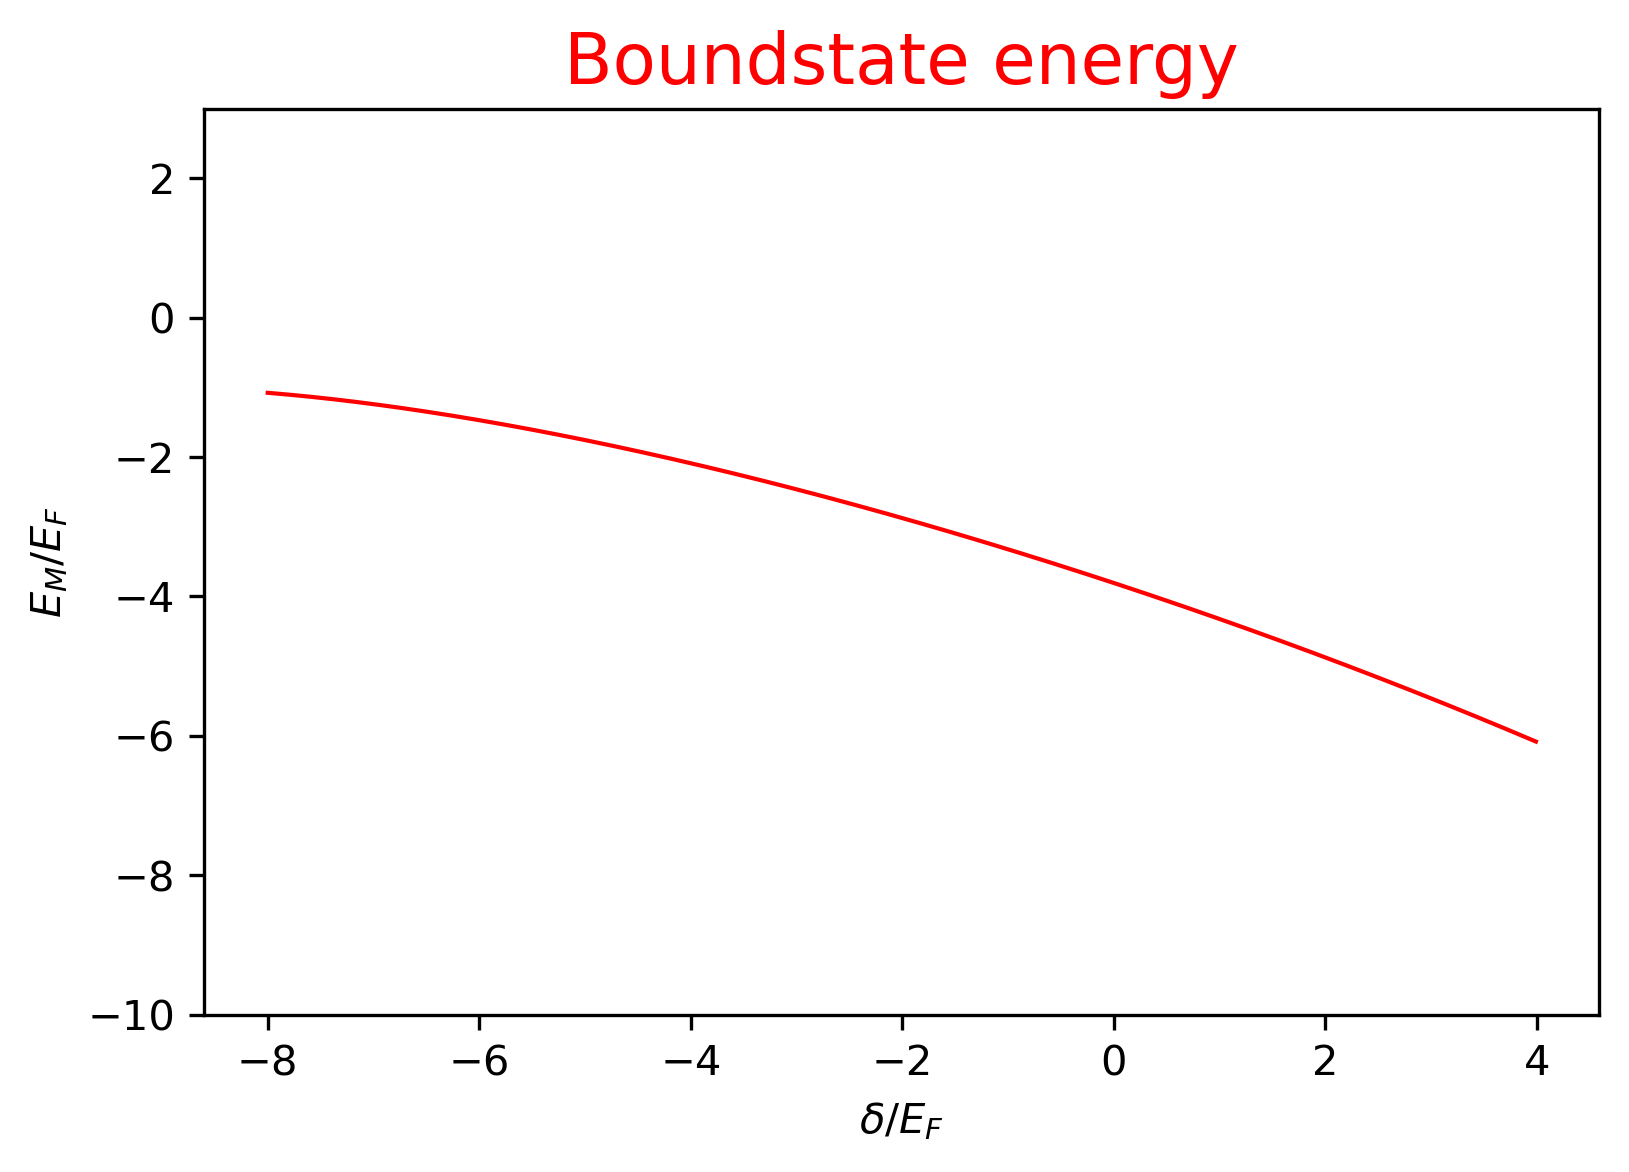

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import romberg
from scipy.misc import derivative
from scipy import optimize
from scipy.optimize import root
import sys

#用到的科学常数
Bohr_mag=9.274e-24
Bohr_radius=0.529e-10
u=1.66054e-27
hbar=1.0545718e-34

#输入原子参数
n=2e19
T=1e-6
ap=1900*Bohr_radius
am=200*Bohr_radius
m=173.04*u

#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2


#计算中间参数
kF=(3*np.pi**2*n)**(1/3)             #！！这个6有可能是3
E0=hbar**2*(kF)**2/2/m
gp=4*np.pi*hbar**2*ap/m*kF**3/E0/(2*np.pi)**2
gm=4*np.pi*hbar**2*am/m*kF**3/E0/(2*np.pi)**2


#定义解析之后的函数
def total(EM):
    return  1/(gp*gm) + 0.5*(1/gp+1/gm)*((-np.pi/2*np.sqrt((delta-EM)/2))+(-np.pi/2*np.sqrt((-EM)/2))) + (-np.pi/2*np.sqrt((delta-EM)/2))*(-np.pi/2*np.sqrt((-EM)/2))


x4=np.arange(-8,4,0.01)
x4=x4[::-1]
Bound_sta1=[]
chu=-1.1248393933948337
for delta in x4:
    solution=optimize.fsolve(total, chu, xtol=1e-10)
    chu=solution[0]
    solution1=solution[0]-delta-1
    Bound_sta1.append(solution1)
    
    

plt.figure(num=2,dpi=300)
plt.plot(x4,Bound_sta1,color='r',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$\delta/E_F$')
plt.ylabel(r'$E_M/E_F$')
plt.ylim(-10,3)
plt.yscale('linear')
#plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Boundstate energy',fontsize=17,color='r')
plt.show()

### 0.2 定义自变量是B积分后的结果

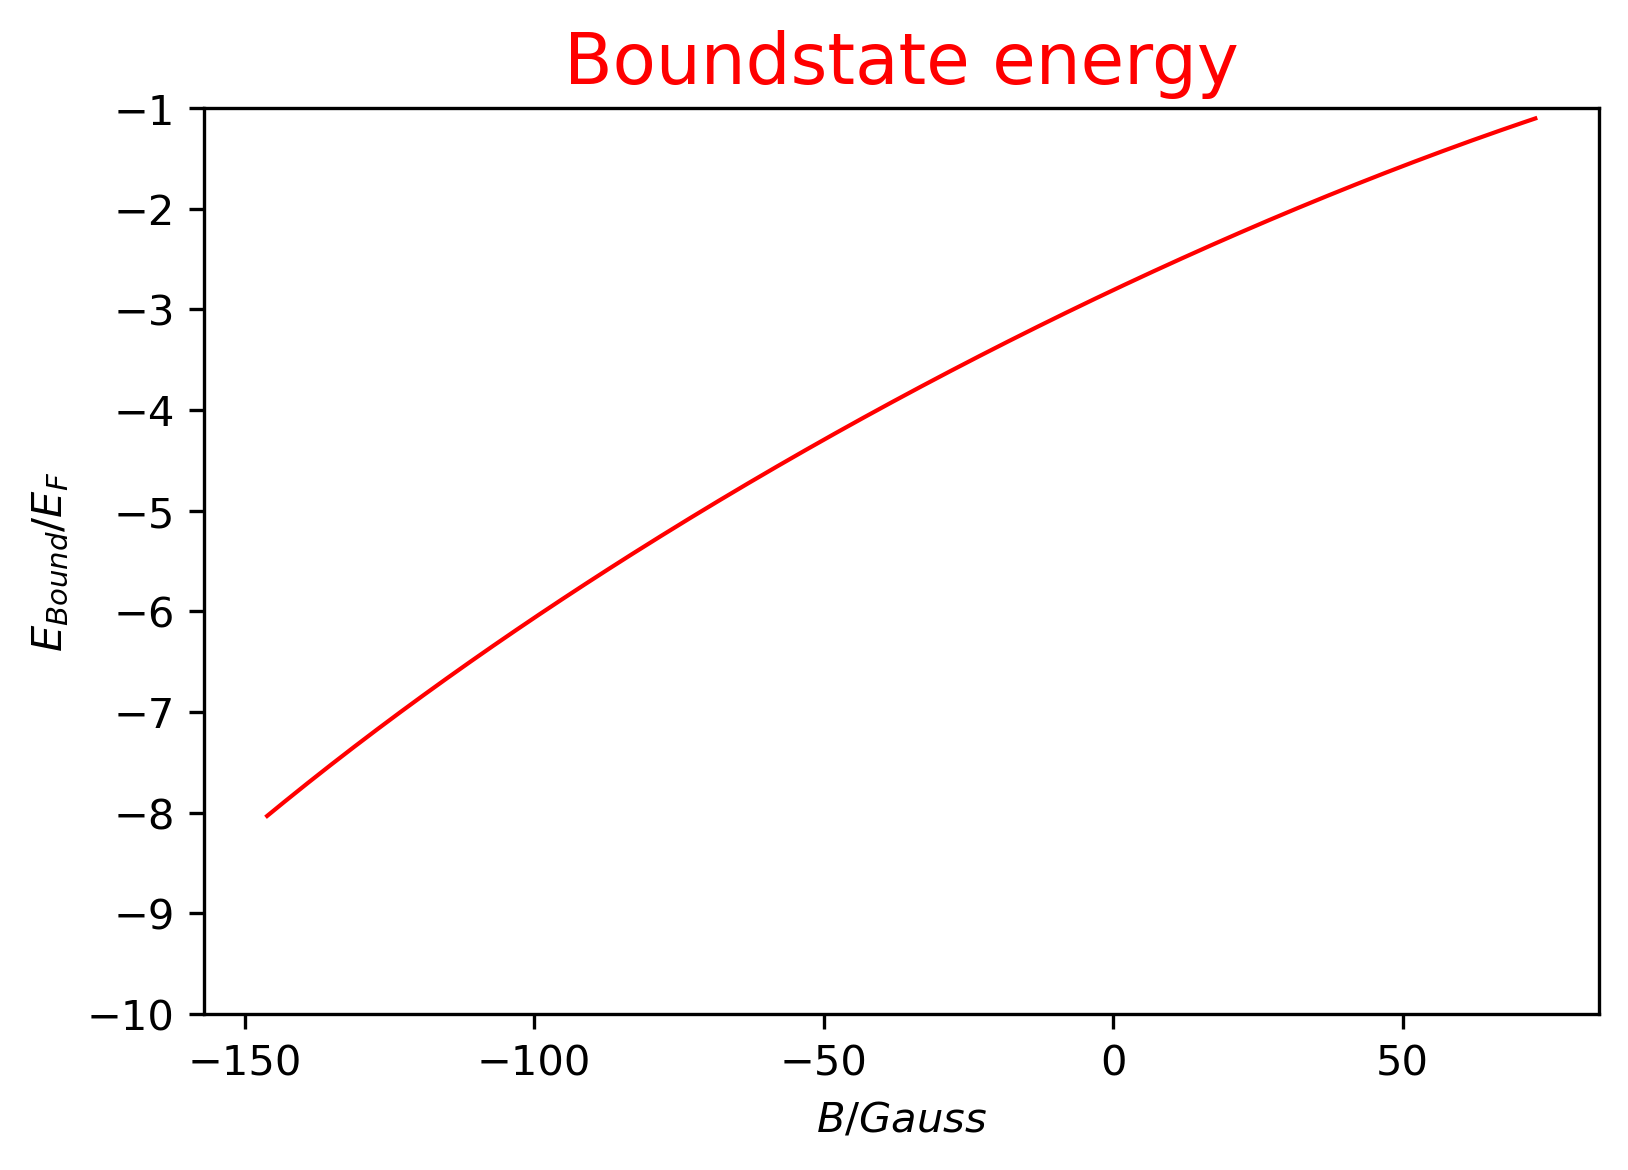

In [79]:
#定义两通道能量差delta，B的单位是Gauss   ##delta改成delta(B)即可
def delta(B):
    return 112*2*np.pi*hbar*B

### 0.3 定义自变量是$\delta$积分后有费米面的结果

C:\Users\dslmd\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in sqrt


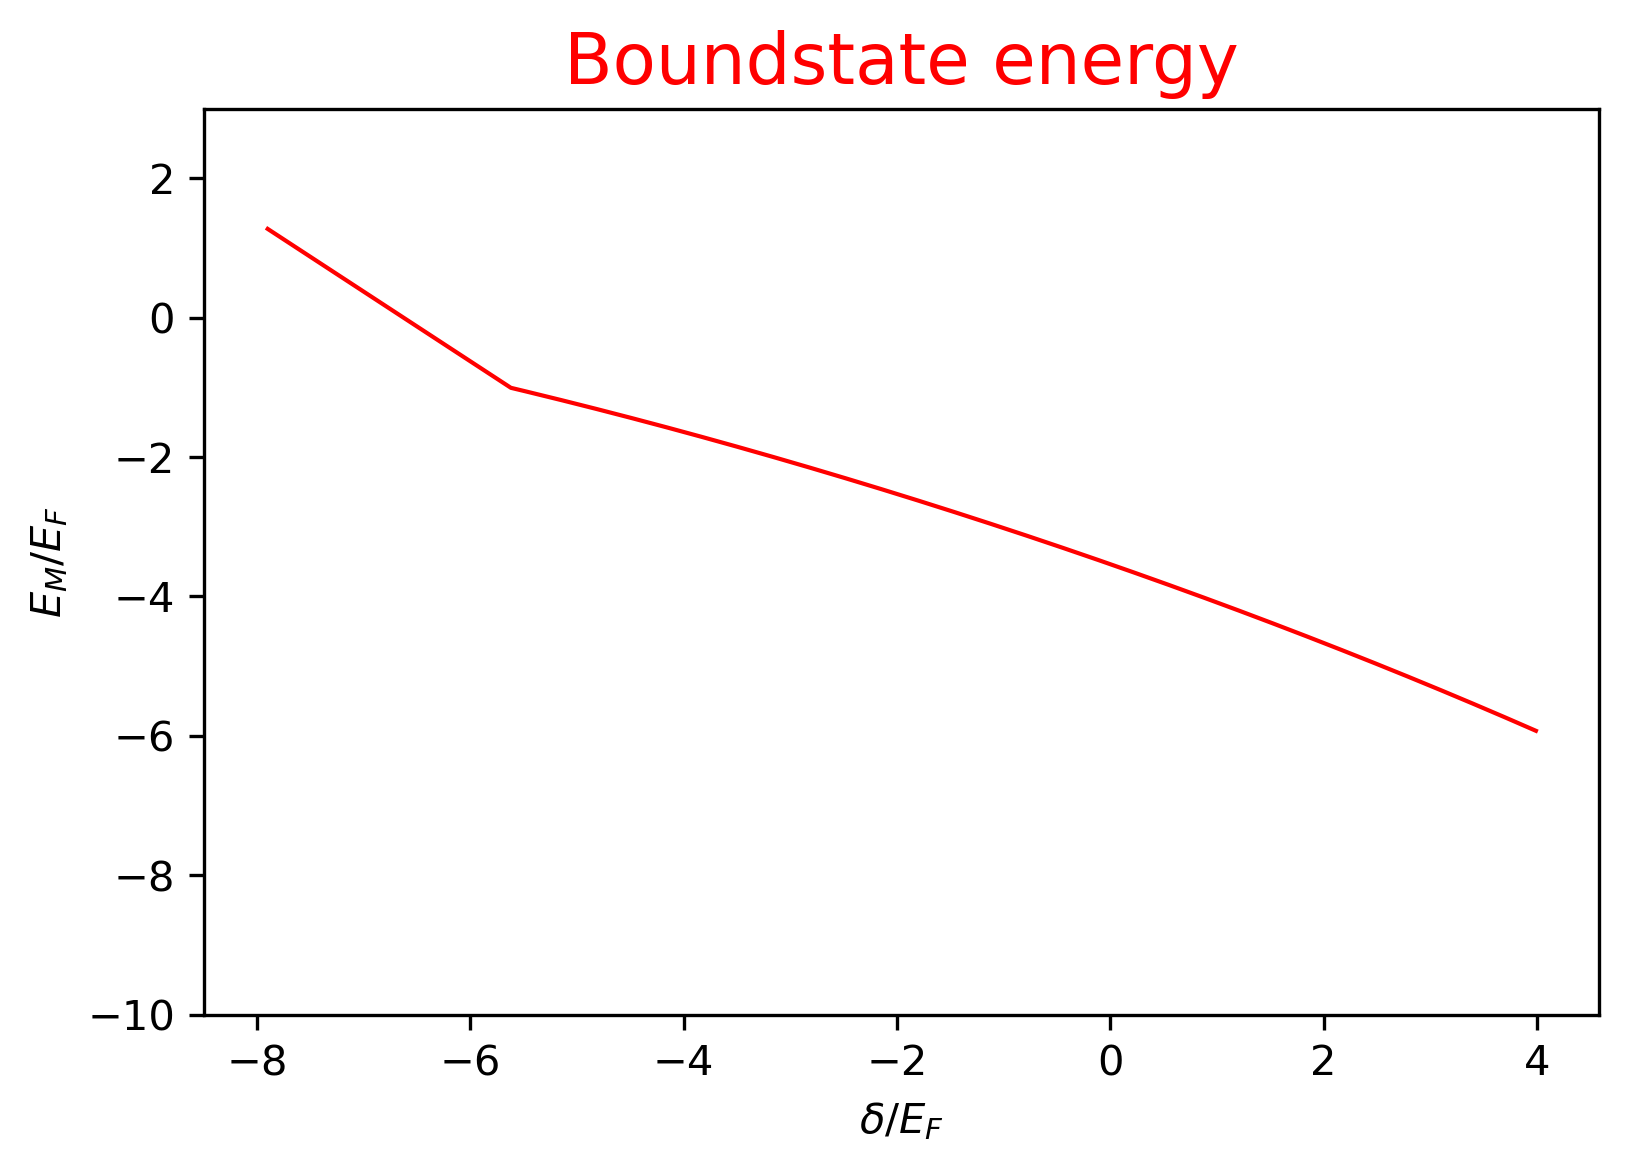

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import romberg
from scipy.misc import derivative
from scipy import optimize
from scipy.optimize import root
import sys

#用到的科学常数
Bohr_mag=9.274e-24
Bohr_radius=0.529e-10
u=1.66054e-27
hbar=1.0545718e-34

#输入原子参数
n=2e19
T=1e-6
ap=1900*Bohr_radius
am=200*Bohr_radius
m=173.04*u

#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2


#计算中间参数
kF=(3*np.pi**2*n)**(1/3)             #！！这个6有可能是3
E0=hbar**2*(kF)**2/2/m
gp=4*np.pi*hbar**2*ap/m*kF**3/E0/(2*np.pi)**2
gm=4*np.pi*hbar**2*am/m*kF**3/E0/(2*np.pi)**2


#定义解析之后的函数
def total(EM):
    return  1/(gp*gm) + 0.5*(1/gp+1/gm)*( ((np.arctan(np.sqrt(2/(delta-EM)))-np.pi/2)*np.sqrt((delta-EM)/2))  +(-np.pi/2*np.sqrt((-EM)/2))  - 1   )        +          ((np.arctan(np.sqrt(2/(delta-EM)))-np.pi/2)*np.sqrt((delta-EM)/2)-1)*(-np.pi/2*np.sqrt((-EM)/2))


x4=np.arange(-7.9,4,0.01)
x4=x4[::-1]
Bound_sta=[]
chu=-0.1
for delta in x4:
    solution=optimize.root(total, chu, tol=1e-10)
    chu=solution.x[0]
    solution1=solution.x[0]-delta-1
    Bound_sta.append(solution1)
#for delta in x4:
#    solution=optimize.fsolve(total, chu, xtol=1e-10)
#    chu=solution[0]
#    solution1=solution[0]-delta-1
#    Bound_sta.append(solution1)
    
    

plt.figure(num=2,dpi=300)
plt.plot(x4,Bound_sta,color='r',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$\delta/E_F$')
plt.ylabel(r'$E_M/E_F$')
plt.ylim(-10,3)
plt.yscale('linear')
#plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Boundstate energy',fontsize=17,color='r')
plt.show()

***
***
## 1. 用$\delta$数值积分重复一下无费米面分子态（我需要的）的结果，自变量是$\delta$

费米能是1.3646683766118282e-30J
费米动量是8397506.176105903
0.5373283164486367 0.056560875415645966


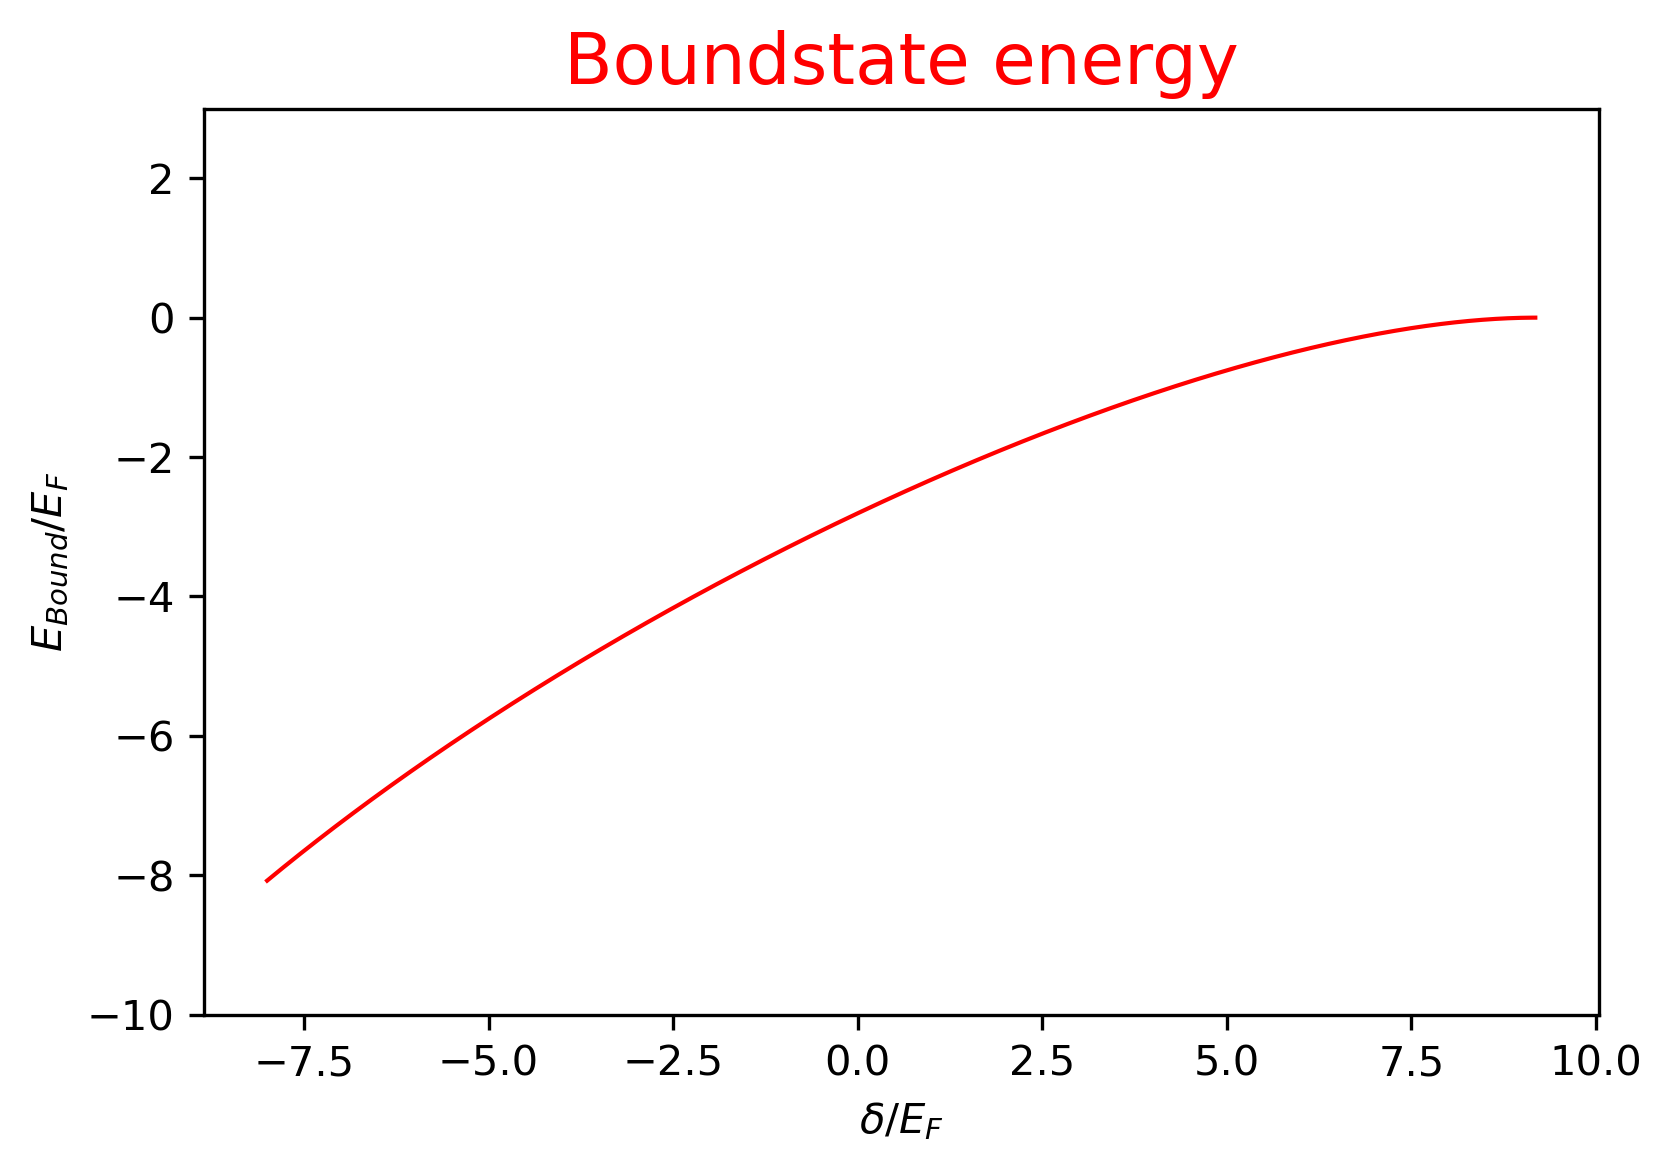

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import romberg
from scipy.misc import derivative
from scipy import optimize
from scipy.optimize import root
import sys

#国际单位制下的科学常数
Bohr_mag=9.274e-24
Bohr_radius=0.529e-10
u=1.66054e-27
hbar=1.0545718e-34

#国际单位制下的原子参数
n=2e19
T=1e-6
ap=1900*Bohr_radius
am=200*Bohr_radius
m=173.04*u

#计算国际单位制下的中间参数
as0=(ap+am)/2
as1=(am-ap)/2
kF=(3*np.pi**2*n)**(1/3)
E0=hbar**2*(kF)**2/2/m

#定义无量纲化中间参数
gp=4*np.pi*hbar**2*ap/m*kF**3/E0/(2*np.pi)**2
gm=4*np.pi*hbar**2*am/m*kF**3/E0/(2*np.pi)**2

print('费米能是'+str(E0)+'J')
print('费米动量是'+str(kF))
print(gp,gm)

def integrand1(k,EM):
    return (EM-delta)/(2*k**2+delta-EM)
def integrand2(k,EM):
    return EM/(2*k**2-EM)


def itg1(EM):
    return quad(integrand1, 0, np.inf, args=(EM))[0]
def itg2(EM):
    return quad(integrand2, 0, np.inf, args=(EM))[0]

def total(EM):
    return  1/(gp*gm) + 0.5*(1/gp+1/gm)*(itg1(EM)+itg2(EM)) + itg1(EM)*itg2(EM)


x4=np.arange(-8,9.19,0.01)
#x4=x4[::-1]

Bound_sta=[]
chu=-8.078509769010545
#chu=-1.1248393933948337
for delta in x4:
    solution=optimize.root(total, chu, tol=1e-15)
    chu=solution.x[0]
    solution1=solution.x[0]#-delta-1
    Bound_sta.append(solution1)

plt.figure(num=2,dpi=300)
plt.plot(x4,Bound_sta,color='r',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$\delta/E_F$')
plt.ylabel(r'$E_{Bound}/E_F$')
plt.ylim(-10,3)
plt.yscale('linear')
#plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Boundstate energy',fontsize=17,color='r')
plt.show()

### 现在去找一下深的那支

In [60]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import romberg
from scipy.misc import derivative
from scipy import optimize
from scipy.optimize import root
import sys

#用到的科学常数
Bohr_mag=9.274e-24
Bohr_radius=0.529e-10
u=1.66054e-27
hbar=1.0545718e-34

#输入原子参数
n=2e19
T=1e-6
ap=1900*Bohr_radius
am=200*Bohr_radius
m=173.04*u

#计算as0、as1
as0=(ap+am)/2
as1=(am-ap)/2


#计算中间参数
kF=(3*np.pi**2*n)**(1/3)
E0=hbar**2*(kF)**2/2/m
gp=4*np.pi*hbar**2*ap/m*kF**3/E0/(2*np.pi)**2
gm=4*np.pi*hbar**2*am/m*kF**3/E0/(2*np.pi)**2

print('费米能是'+str(E0)+'J')
print('费米动量是'+str(kF))
print(gp,gm)

def integrand1(k,EM):
    return (EM-delta)/(2*k**2+delta-EM)
def integrand2(k,EM):
    return EM/(2*k**2-EM)


def itg1(EM):
    return quad(integrand1, 0, np.inf, args=(EM))[0]
def itg2(EM):
    return quad(integrand2, 0, np.inf, args=(EM))[0]

def total(EM):
    return  1/(gp*gm) + 0.5*(1/gp+1/gm)*(itg1(EM)+itg2(EM)) + itg1(EM)*itg2(EM)

x4=np.arange(-8,9.19,0.01)
#x4=x4[::-1]
Bound_sta1=[]
chu=-100
#chu=-8.078509769010545
#chu=-1.1248393933948337
for delta in x4:
    solution=optimize.root(total, chu, tol=1e-15)
    chu=solution.x[0]
    solution1=solution.x[0]#-delta-1
    Bound_sta1.append(solution1)

费米能是1.3646683766118282e-30J
费米动量是8397506.176105903
0.5373283164486367 0.056560875415645966


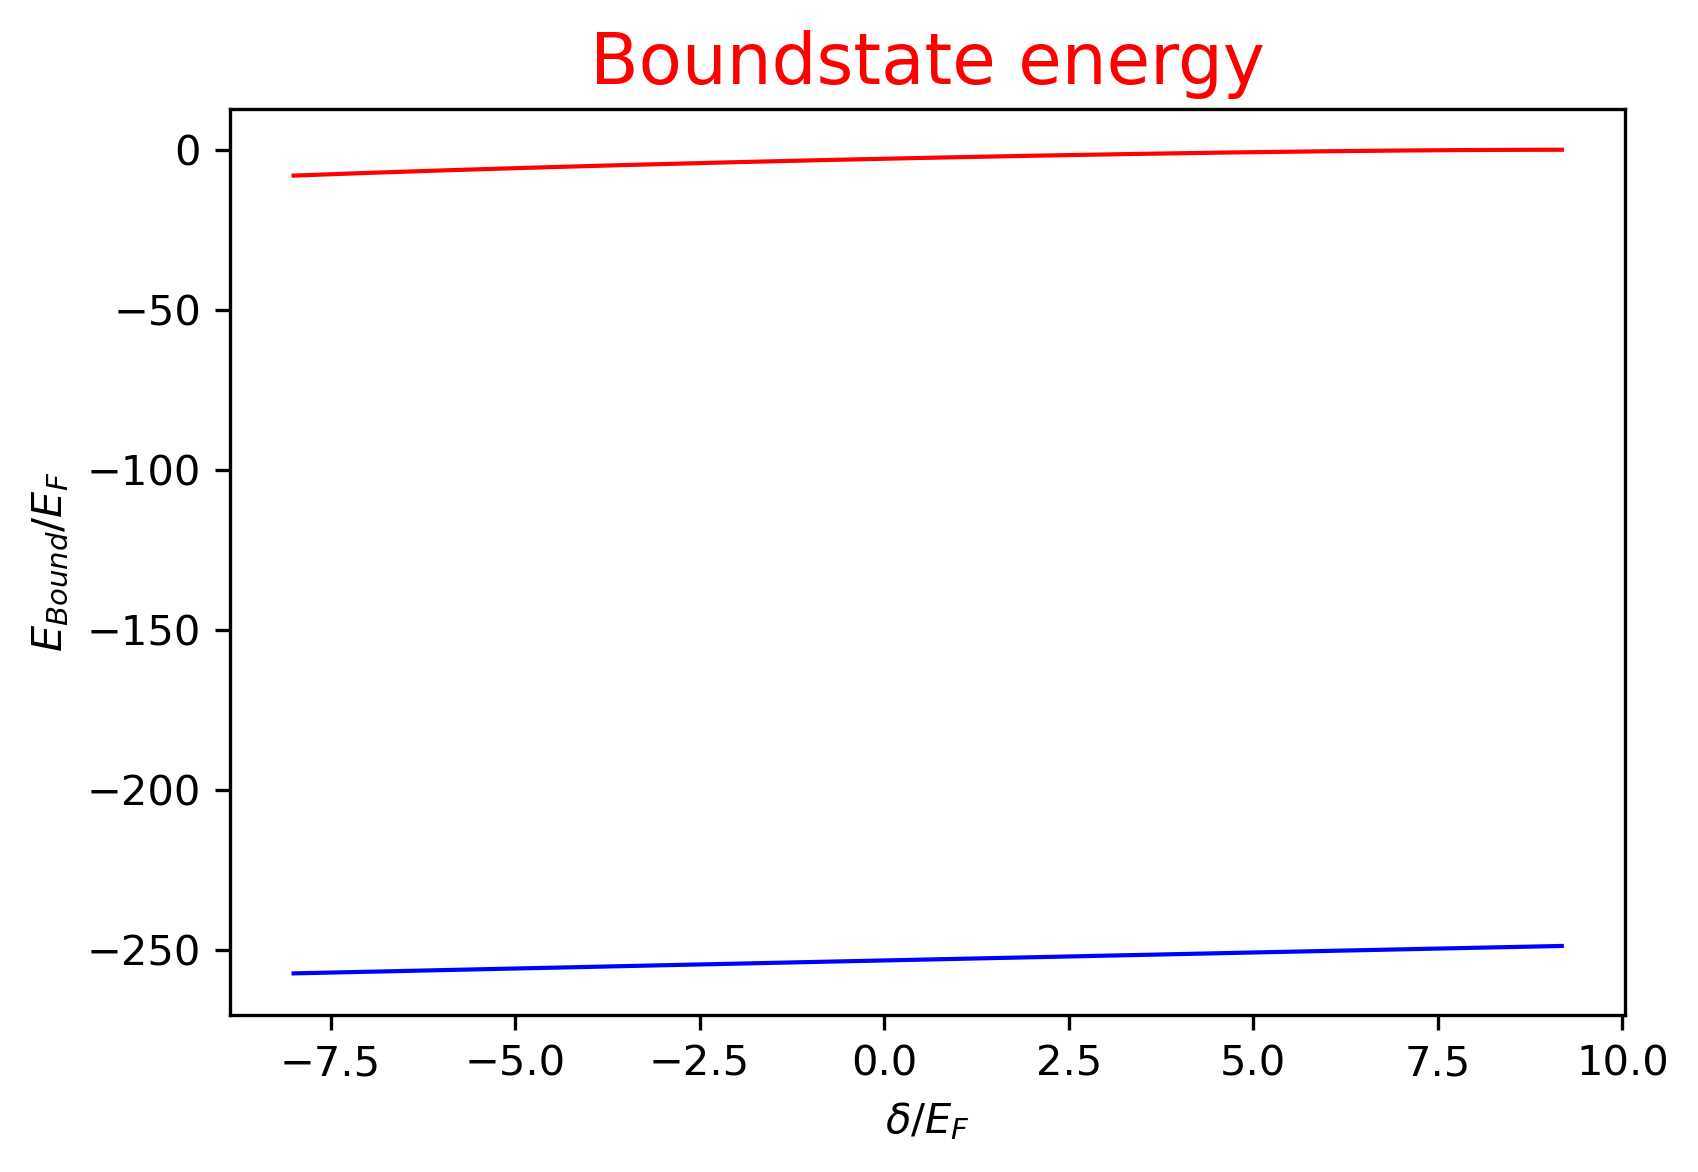

In [68]:
plt.figure(num=2,dpi=300)
plt.plot(x4,Bound_sta,color='r',linewidth=1.0,linestyle='-')
plt.plot(x4,Bound_sta1,color='b',linewidth=1.0,linestyle='-')
ax=plt.gca()
plt.xlabel(r'$\delta/E_F$')
plt.ylabel(r'$E_{Bound}/E_F$')
#plt.ylim(-10,3)
plt.yscale('linear')
#plt.legend(handles=[l0,l1,l2],labels=['zero-order','second-order','accurate but with a upper limit'],loc='upper right',fontsize='small')
ax.set_title('Boundstate energy',fontsize=17,color='r')
plt.show()

In [5]:
from scipy.integrate import quad
import numpy as np
from scipy import optimize

def integrand1(k,x):
    return 1/(k**2+x)
def sol(x):
     return quad(integrand1, 0, np.inf,args=(x))[0]-1
print(optimize.root(sol,1))

    fjac: array([[-1.]])
     fun: 0.0
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.08348885e-11])
       r: array([0.20264241])
  status: 1
 success: True
       x: array([2.4674011])
